<a href="https://colab.research.google.com/github/GyanLevy/Cloud_Computing/blob/main/tut4HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch version: 2.9.0+cu126
CUDA available: True

=== טעינת מערך הנתונים ===


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00002.parquet:   0%|          | 0.00/321M [00:00<?, ?B/s]

data/train-00001-of-00002.parquet:   0%|          | 0.00/362M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/170M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43456 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10849 [00:00<?, ? examples/s]


מבנה מערך הנתונים:
DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 43456
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10849
    })
})
מספר דוגמאות באימון: 34764
מספר דוגמאות באימות: 8692
מספר דוגמאות בבדיקה: 10849

מספר מחלקות: 38

10 מחלקות ראשונות:
0: Apple___Apple_scab
1: Apple___Black_rot
2: Apple___Cedar_apple_rust
3: Apple___healthy
4: Blueberry___healthy
5: Cherry_(including_sour)___Powdery_mildew
6: Cherry_(including_sour)___healthy
7: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8: Corn_(maize)___Common_rust_
9: Corn_(maize)___Northern_Leaf_Blight

=== דוגמה מהנתונים ===
גודל תמונה: (256, 256)
תווית: Orange___Haunglongbing_(Citrus_greening)
דוגמאות נשמרו בקובץ: plant_disease_samples.png

=== טעינת מודל מאומן מראש ===
מודל נבחר: linkanjarad/mobilenet_v2_1.0_224-plant-disease-identification


preprocessor_config.json:   0%|          | 0.00/408 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/9.34M [00:00<?, ?B/s]

מודל נטען בהצלחה עם 38 מחלקות

=== עיבוד מקדים של הנתונים (on-the-fly) ===
with_transform הוגדר — אין map ואין מחיקה של 'image' ✔

=== הגדרת פרמטרי הרצה (בלי אימון) ===

=== יצירת Trainer (ללא אימון) ===
מדלגים על אימון — משתמשים במודל מאומן מראש ✔

=== הערכה על סט הבדיקה ===


model.safetensors:   0%|          | 0.00/9.26M [00:00<?, ?B/s]


תוצאות על סט הבדיקה:
  - Accuracy: 0.9558 (95.58%)
  - F1 Score: 0.9560

=== יצירת Confusion Matrix ===
Confusion matrix נשמר בקובץ: confusion_matrix_mobilenet.png

=== ניתוח שגיאות ===

5 המחלקות עם הדיוק הנמוך ביותר:
  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 75.49% (מתוך 102 דוגמאות)
  Potato___Late_blight: 77.00% (מתוך 200 דוגמאות)
  Tomato___Early_blight: 80.50% (מתוך 200 דוגמאות)
  Tomato___Target_Spot: 83.57% (מתוך 280 דוגמאות)
  Tomato___Septoria_leaf_spot: 84.75% (מתוך 354 דוגמאות)

5 המחלקות עם הדיוק הגבוה ביותר:
  Grape___healthy: 100.00% (מתוך 84 דוגמאות)
  Orange___Haunglongbing_(Citrus_greening): 100.00% (מתוך 1101 דוגמאות)
  Peach___healthy: 100.00% (מתוך 72 דוגמאות)
  Squash___Powdery_mildew: 100.00% (מתוך 367 דוגמאות)
  Tomato___healthy: 100.00% (מתוך 318 דוגמאות)

=== שמירת המודל ===
מודל נשמר בתיקייה: ./final-model-mobilenet

=== דוגמה לתחזית ===
לשימוש בפונקציית התחזית:

# טעינת המודל השמור
from transformers import AutoImageProcessor, AutoModelForImageCl

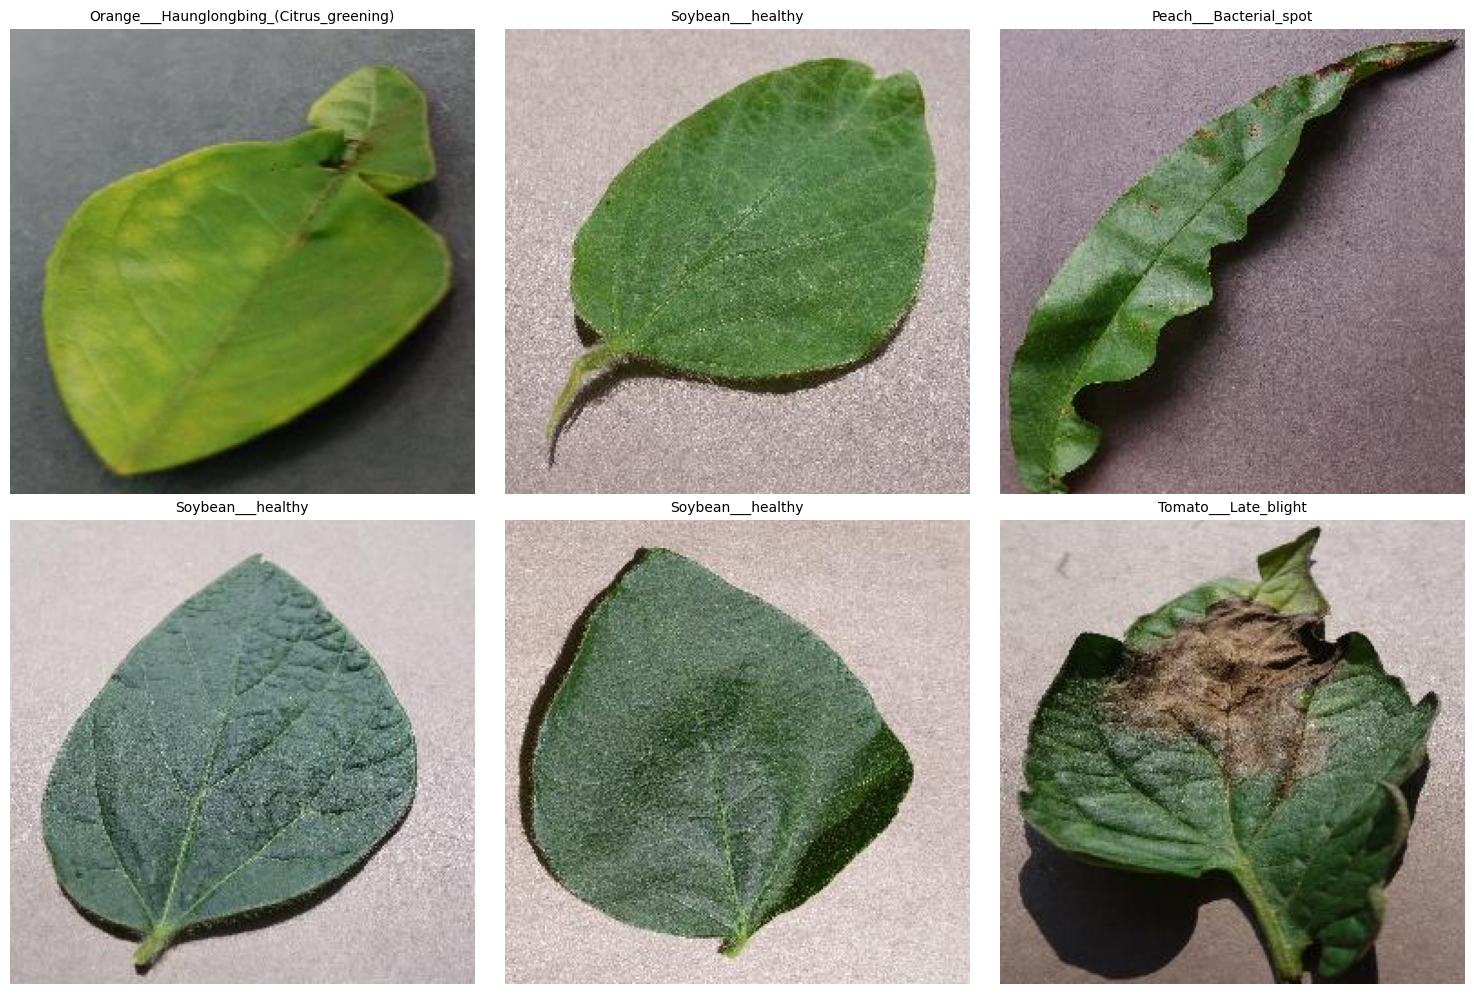

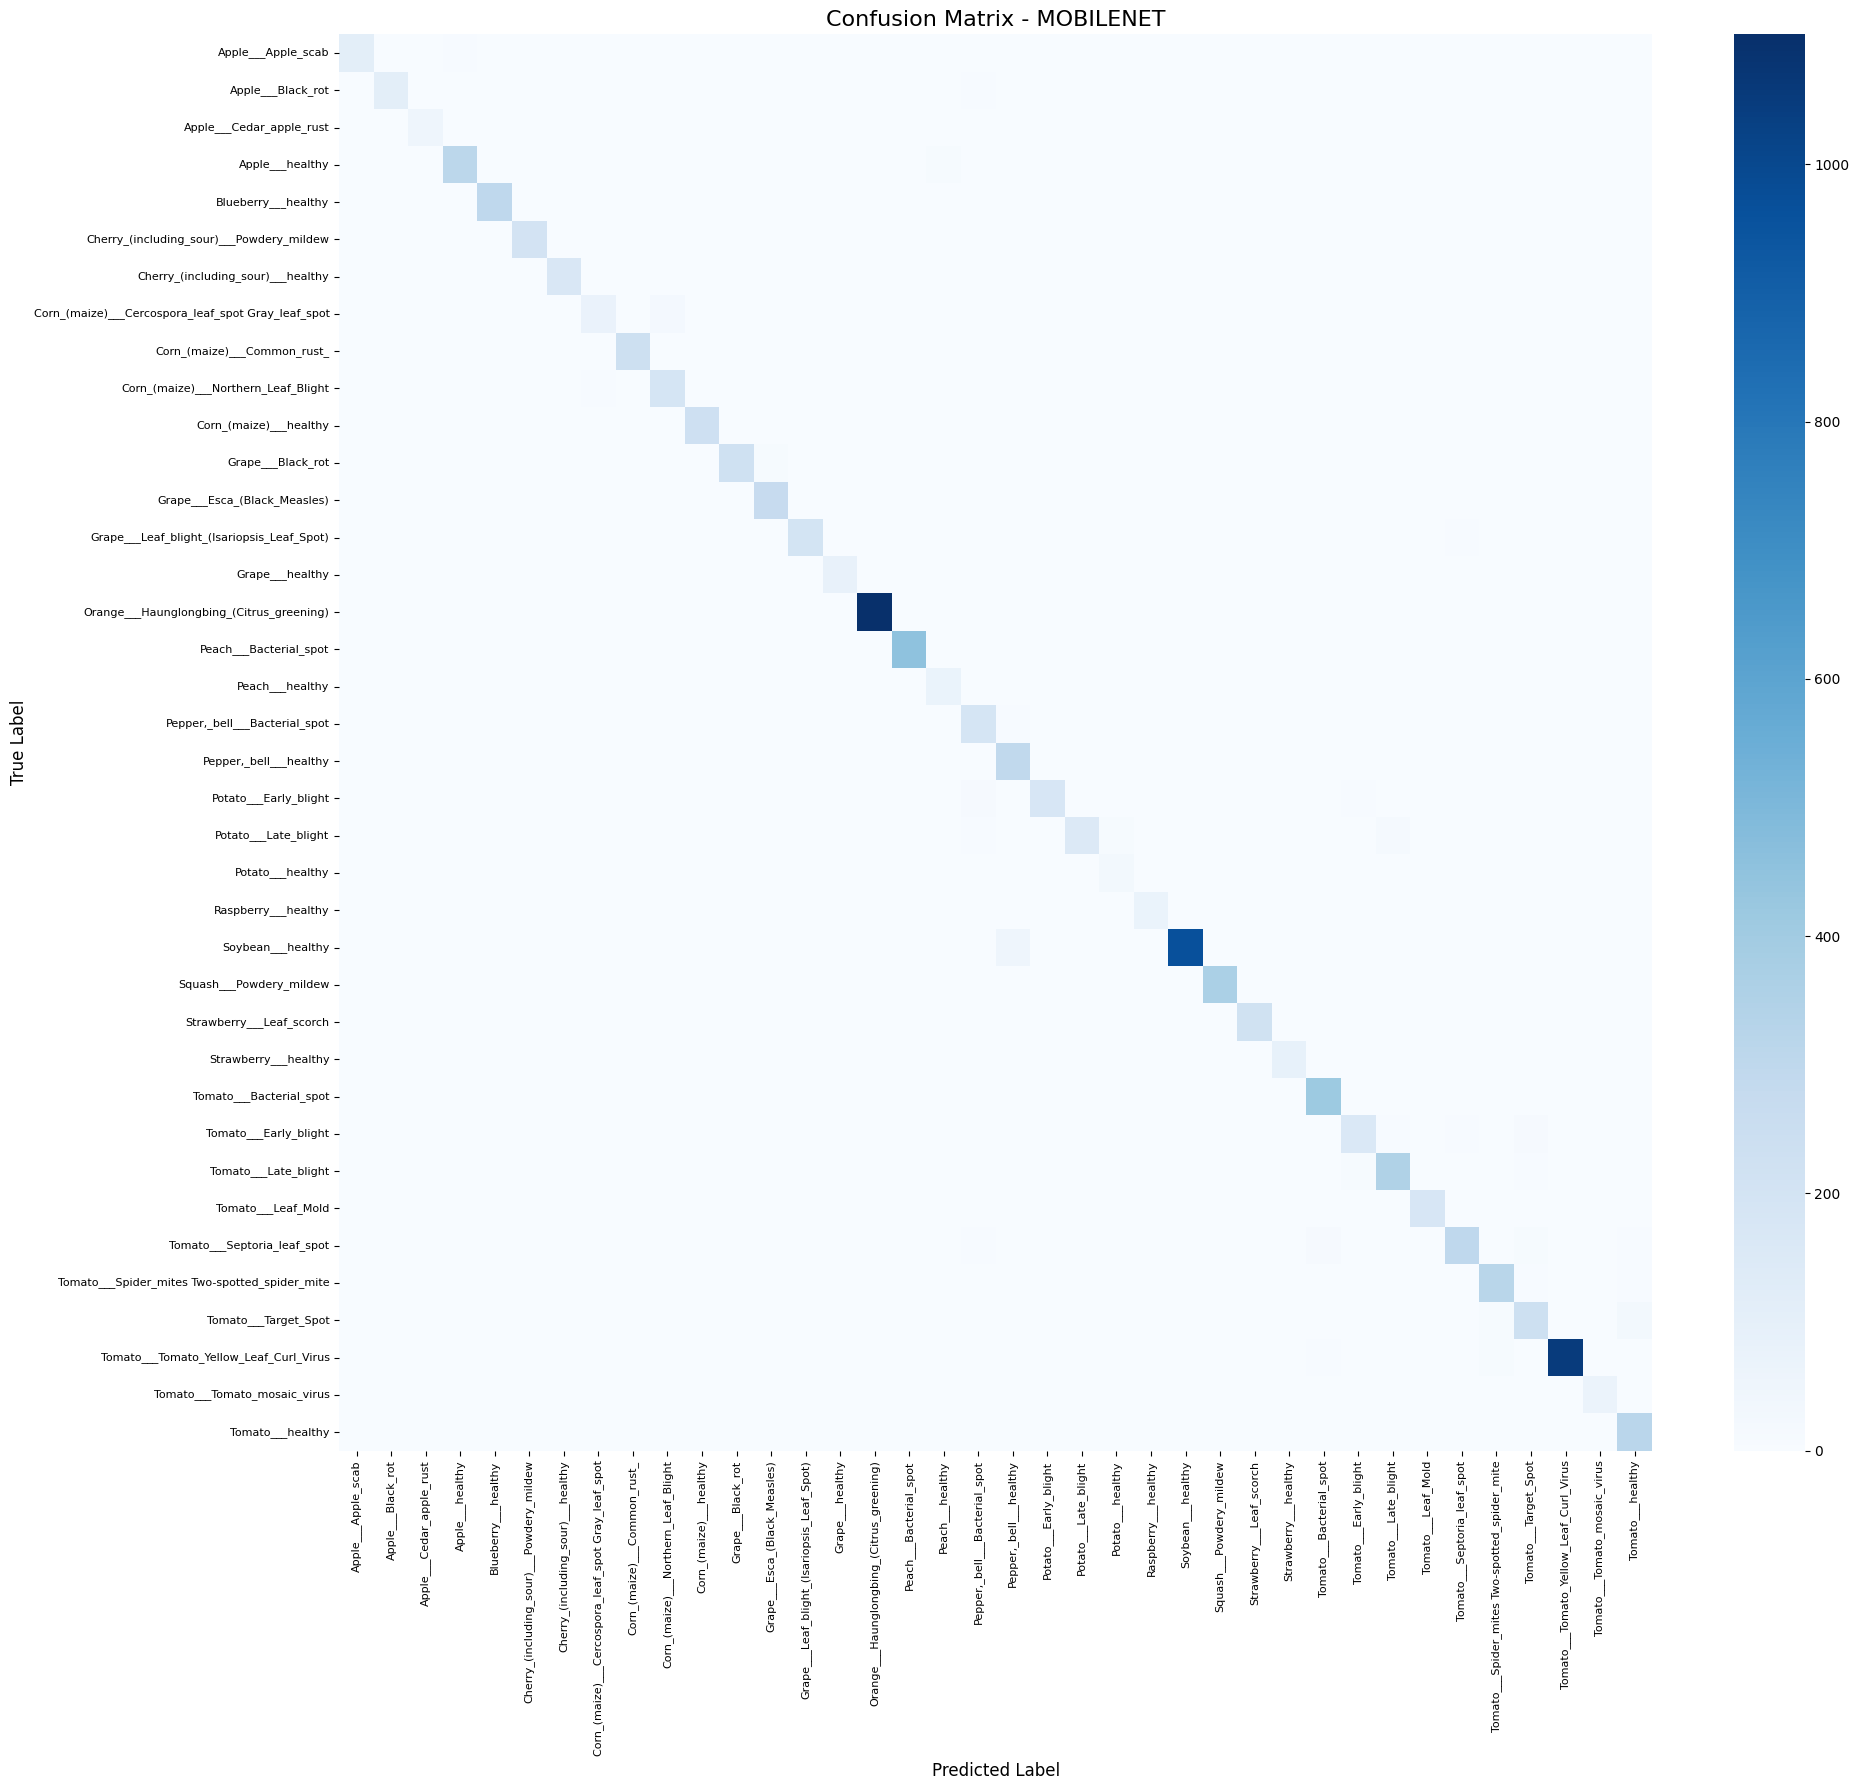

In [ ]:


# ============================================================================
# חלק 1: התקנה וייבוא ספריות
# ============================================================================

# התקנת הספריות הנדרשות (הריצו בטרמינל)
"""
pip install transformers datasets torch torchvision pillow
pip install scikit-learn matplotlib seaborn gradio
"""

# ייבוא ספריות
import torch
from transformers import (
    AutoImageProcessor,
    AutoModelForImageClassification,
    TrainingArguments,
    Trainer
)
from datasets import load_dataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# ============================================================================
# חלק 2: טעינת וחקירת מערך הנתונים
# ============================================================================

# ============================================================================
# חלק 2: טעינת וחקירת מערך הנתונים
# ============================================================================

print("\n=== טעינת מערך הנתונים ===")

dataset = load_dataset("BrandonFors/Plant-Diseases-PlantVillage-Dataset")
print(f"\nמבנה מערך הנתונים:")
print(dataset)

# יצירת validation מתוך train (20%)
split_dataset = dataset["train"].train_test_split(test_size=0.2, seed=42)
train_ds = split_dataset["train"]
val_ds   = split_dataset["test"]
test_ds  = dataset["test"]

print(f"מספר דוגמאות באימון: {len(train_ds)}")
print(f"מספר דוגמאות באימות: {len(val_ds)}")
print(f"מספר דוגמאות בבדיקה: {len(test_ds)}")

# הצגת מחלקות
label_names = train_ds.features['label'].names
num_labels = len(label_names)
print(f"\nמספר מחלקות: {num_labels}")
print(f"\n10 מחלקות ראשונות:")
for i, label in enumerate(label_names[:10]):
    print(f"{i}: {label}")

# דוגמה
print("\n=== דוגמה מהנתונים ===")
example = train_ds[0]
print(f"גודל תמונה: {example['image'].size}")
print(f"תווית: {label_names[example['label']]}")

# ============================================================================
# חלק 3: הצגה ויזואלית של הנתונים
# ============================================================================

def visualize_samples(dataset, num_samples=6):
    """הצגת דוגמאות מהמערך"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i in range(num_samples):
        sample = train_ds[i * 100]  # לוקחים דוגמאות מפוזרות
        axes[i].imshow(sample['image'])
        axes[i].set_title(label_names[sample['label']], fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig('plant_disease_samples.png', dpi=150, bbox_inches='tight')
    print("דוגמאות נשמרו בקובץ: plant_disease_samples.png")

# הצגת דוגמאות
visualize_samples(dataset)

# ============================================================================
# חלק 4: הכנת מודל ו-Processor
# ============================================================================
print("\n=== טעינת מודל מאומן מראש ===")

model_name = "linkanjarad/mobilenet_v2_1.0_224-plant-disease-identification"
selected_model = "mobilenet"

print(f"מודל נבחר: {model_name}")

processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    ignore_mismatched_sizes=True
)

print(f"מודל נטען בהצלחה עם {num_labels} מחלקות")


# ============================================================================
# חלק 5: עיבוד מקדים של הנתונים
# ============================================================================

# ============================================================================
# חלק 5: עיבוד מקדים של הנתונים (מהיר - on-the-fly)
# ============================================================================

print("\n=== עיבוד מקדים של הנתונים (on-the-fly) ===")

def transform(examples):
    imgs = examples["image"]
    # examples מגיע בבאצ'ים -> בדרך כלל רשימה
    if isinstance(imgs, list):
        images = [img.convert("RGB") for img in imgs]
    else:
        images = [imgs.convert("RGB")]

    inputs = processor(images, return_tensors="pt")
    inputs["labels"] = examples["label"]
    return inputs

# חשוב: עובדים על ה-splits הגולמיים שיש בהם 'image'
train_dataset = train_ds.with_transform(transform)
eval_dataset  = val_ds.with_transform(transform)
test_dataset  = test_ds.with_transform(transform)

print("with_transform הוגדר — אין map ואין מחיקה של 'image' ✔")


# ============================================================================
# חלק 6: הגדרת מטריקות הערכה
# ============================================================================

def compute_metrics(pred):
    """חישוב מטריקות הערכה"""
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')

    return {
        'accuracy': acc,
        'f1': f1
    }

# ============================================================================
# חלק 7: הגדרת פרמטרי אימון
# ============================================================================

print("\n=== הגדרת פרמטרי הרצה (בלי אימון) ===")

training_args = TrainingArguments(
    output_dir="./plant-disease-mobilenet",
    eval_strategy="no",
    save_strategy="no",
    per_device_eval_batch_size=16,
    report_to="none",
    remove_unused_columns=False
)

# ============================================================================
# חלק 8: יצירת Trainer ואימון
# ============================================================================

print("\n=== יצירת Trainer (ללא אימון) ===")

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
)

print("מדלגים על אימון — משתמשים במודל מאומן מראש ✔")


# אימון המודל
#print("\nמתחיל אימון... (זה עשוי לקחת זמן)")
#train_result = trainer.train()

# הצגת תוצאות אימון
#print("\n=== תוצאות אימון ===")
#print(f"זמן אימון כולל: {train_result.metrics['train_runtime']:.2f} שניות")
#print(f"Loss סופי: {train_result.metrics['train_loss']:.4f}")

# ============================================================================
# חלק 9: הערכה על סט הבדיקה
# ============================================================================

print("\n=== הערכה על סט הבדיקה ===")

# הערכה על סט הבדיקה
test_results = trainer.evaluate(test_dataset)

print(f"\nתוצאות על סט הבדיקה:")
print(f"  - Accuracy: {test_results['eval_accuracy']:.4f} ({test_results['eval_accuracy']*100:.2f}%)")
print(f"  - F1 Score: {test_results['eval_f1']:.4f}")

# ============================================================================
# חלק 10: יצירת Confusion Matrix
# ============================================================================

print("\n=== יצירת Confusion Matrix ===")

# קבלת תחזיות
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# יצירת confusion matrix
cm = confusion_matrix(y_true, y_pred)

# הצגה ויזואלית
plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.title(f'Confusion Matrix - {selected_model.upper()}', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(f'confusion_matrix_{selected_model}.png', dpi=150, bbox_inches='tight')
print(f"Confusion matrix נשמר בקובץ: confusion_matrix_{selected_model}.png")

# ============================================================================
# חלק 11: ניתוח שגיאות
# ============================================================================

print("\n=== ניתוח שגיאות ===")

# מציאת המחלקות הכי בעייתיות
errors_per_class = []
for i in range(num_labels):
    mask = y_true == i
    if mask.sum() > 0:
        class_accuracy = (y_pred[mask] == y_true[mask]).mean()
        errors_per_class.append((label_names[i], class_accuracy, mask.sum()))

# מיון לפי דיוק (הנמוכים ביותר)
errors_per_class.sort(key=lambda x: x[1])

print("\n5 המחלקות עם הדיוק הנמוך ביותר:")
for label, acc, count in errors_per_class[:5]:
    print(f"  {label}: {acc:.2%} (מתוך {count} דוגמאות)")

print("\n5 המחלקות עם הדיוק הגבוה ביותר:")
for label, acc, count in errors_per_class[-5:]:
    print(f"  {label}: {acc:.2%} (מתוך {count} דוגמאות)")

# ============================================================================
# חלק 12: שמירת המודל
# ============================================================================

print("\n=== שמירת המודל ===")

# שמירה מקומית
save_path = f"./final-model-{selected_model}"
trainer.save_model(save_path)
processor.save_pretrained(save_path)
print(f"מודל נשמר בתיקייה: {save_path}")

# לשמירה ל-Hugging Face Hub (הסירו הערה ושנו את username)
# model_hub_name = "username/plant-disease-classifier"
# trainer.push_to_hub(model_hub_name)
# processor.push_to_hub(model_hub_name)
# print(f"מודל הועלה ל-Hub: {model_hub_name}")

# ============================================================================
# חלק 13: פונקציה לתחזית על תמונה חדשה
# ============================================================================

def predict_disease(image_path, model, processor, label_names, top_k=3):
    """
    תחזית מחלה מתמונה

    Args:
        image_path: נתיב לתמונה
        model: המודל המאומן
        processor: ה-processor של התמונות
        label_names: רשימת שמות המחלקות
        top_k: מספר התחזיות המובילות להצגה

    Returns:
        רשימת טאפלים של (שם_מחלה, ציון_ביטחון)
    """
    # טעינת התמונה
    image = Image.open(image_path).convert("RGB")

    # עיבוד מקדים
    inputs = processor(images=image, return_tensors="pt")

    # העברה למכשיר (GPU/CPU)
    device = model.device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # תחזית
    with torch.no_grad():
        outputs = model(**inputs)

    # חישוב הסתברויות
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)[0]

    # מציאת top-k תחזיות
    top_probs, top_indices = torch.topk(probabilities, k=top_k)

    results = []
    for prob, idx in zip(top_probs, top_indices):
        disease_name = label_names[idx.item()]
        confidence = prob.item()
        results.append((disease_name, confidence))

    return results

# דוגמה לשימוש
print("\n=== דוגמה לתחזית ===")
print("לשימוש בפונקציית התחזית:")
print("""
# טעינת המודל השמור
from transformers import AutoImageProcessor, AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained(save_path)
processor = AutoImageProcessor.from_pretrained(save_path)

# ביצוע תחזית
results = predict_disease('path/to/image.jpg', model, processor, label_names)

# הצגת תוצאות
print("תחזיות:")
for i, (disease, confidence) in enumerate(results, 1):
    print(f"{i}. {disease}: {confidence:.2%}")
""")

# ============================================================================
# חלק 14: יצירת ממשק Gradio (אופציונלי)
# ============================================================================

"""
ליצירת ממשק גרפי עם Gradio:

import gradio as gr

def predict_with_gradio(image):
    # המרת תמונה לפורמט נכון
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)[0]

    # יצירת מילון תוצאות
    results = {label_names[i]: float(probabilities[i]) for i in range(len(label_names))}

    # החזרת top 5
    sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True)[:5])

    return sorted_results

# יצירת הממשק
interface = gr.Interface(
    fn=predict_with_gradio,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=5),
    title="מזהה מחלות צמחים",
    description="העלו תמונת עלה וקבלו זיהוי של המחלה"
)

# הפעלת הממשק
interface.launch()
"""

# ============================================================================
# חלק 15: סיכום ומסקנות
# ============================================================================

print("\n" + "="*70)
print("סיכום התרגיל")
print("="*70)
print(f"\nמודל: {selected_model}")
print(f"מספר מחלקות: {num_labels}")
print(f"דיוק על סט הבדיקה: {test_results['eval_accuracy']:.4f}")
print(f"F1 Score: {test_results['eval_f1']:.4f}")
print(f"\nקבצים שנוצרו:")
print(f"  - plant_disease_samples.png")
print(f"  - confusion_matrix_{selected_model}.png")
print(f"  - המודל נשמר בתיקייה: {save_path}")
print("\n" + "="*70)

print("\n✅ התרגיל הושלם בהצלחה!")
print("\nצעדים הבאים:")
print("1. נסו מודלים שונים (שנו את selected_model)")
print("2. נסו להוסיף data augmentation")
print("3. נסו לשפר את הדיוק עם hyperparameter tuning")
print("4. העלו את המודל ל-Hugging Face Hub")
print("5. צרו ממשק Gradio לשיתוף המודל")

In [ ]:
#בדיקת אם GPU נתמך
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

True
Tesla T4


In [ ]:
from google.colab import files
from transformers import pipeline

# יצירת ה-Pipeline
clf = pipeline(
    "image-classification",
    model="linkanjarad/mobilenet_v2_1.0_224-plant-disease-identification"
)

# העלאת תמונה
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# סיווג
pred = clf(image_path)
print("\n=== התוצאות המובילות ===")
for p in pred[:5]:
    print(f"{p['label']} — {p['score']:.2%}")


In [ ]:
!pip install gradio

import gradio as gr
from transformers import pipeline

clf = pipeline(
    "image-classification",
    model="linkanjarad/mobilenet_v2_1.0_224-plant-disease-identification"
)

def predict(image):
    preds = clf(image)
    return {p["label"]: float(p["score"]) for p in preds[:5]}

gr.Interface(
    fn=predict,
    inputs=gr.Image(type="filepath"),
    outputs=gr.Label(num_top_classes=5),
    title="🌿 מזהה מחלות עלים",
    description="העלו תמונה של עלה וקבלו זיהוי מחלה"
).launch()
